In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reg_2021 = pd.read_csv("./player_stats/2021/regular_season.csv")

In [3]:
pgs = reg_2021.loc[reg_2021["POS"] == "PG"].sort_values("PTS",ascending = False)

In [4]:
sgs = reg_2021.loc[reg_2021["POS"] == "SG"].sort_values("PTS",ascending = False)

In [5]:
pfs = reg_2021.loc[reg_2021["POS"] == "PF"].sort_values("PTS",ascending = False)

In [6]:
sfs = reg_2021.loc[reg_2021["POS"] == "SF"].sort_values("PTS",ascending = False)

In [7]:
cs = reg_2021.loc[reg_2021["POS"] == "C"].sort_values("PTS",ascending = False)

(0, 32.54732154395873)

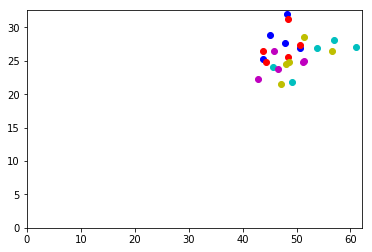

In [8]:
plt.scatter("FG%","PTS",marker="o",c = "b", data = pgs.head(5),)
plt.scatter("FG%","PTS",marker="o",c = "r", data = sgs.head(5))
plt.scatter("FG%","PTS",marker="o",c = "c", data = pfs.head(5))
plt.scatter("FG%","PTS",marker="o",c = "m", data = sfs.head(5))
plt.scatter("FG%","PTS",marker="o",c = "y", data = cs.head(5))
plt.xlim(0)
plt.ylim(0)

In [9]:
def segment_data(df, top_n_players):
    pos_dict = {}
    pos = ['PG','SG','PF','SF','C','F','G']
    
    for p in pos:
        pos_dict[p] = df.loc[df['POS'] == p].sort_values("PTS",ascending = False).head(top_n_players)
        
    return pos_dict

In [10]:
def get_data(last_n_years, top_n_players):
    from time import strftime, localtime
    import pandas as pd
    
    this_year = int(strftime("%Y",localtime())) -1
    dfs = {}
    for y in range(this_year,this_year - last_n_years,-1):
        df = pd.read_csv("./player_stats/"+str(y)+"/regular_season.csv")
        dfs[y] = segment_data(df, top_n_players)
        
    return dfs

In [11]:
dfs = get_data(3,10)

In [12]:
dfs[2021]['SG'][['Name','PTS','Team']]

,Name,PTS,Team
513,Bradley Beal,31.3,WSH
210,Zach LaVine,27.4,CHI
611,Donovan Mitchell,26.4,UTAH
169,Devin Booker,25.6,PHX
342,James Harden,24.8,HOU
1,Jaylen Brown,24.7,BOS
23,James Harden,24.6,BKN
131,Paul George,23.3,LAC
595,CJ McCollum,23.1,POR
343,Victor Oladipo,21.2,HOU


In [13]:
dfs[2021]['sg'.upper()][["Name","POS","Team","PTS","AST","FG%","3P%","3PM"]]

,Name,POS,Team,PTS,AST,FG%,3P%,3PM
513,Bradley Beal,SG,WSH,31.3,4.4,48.5,34.9,2.2
210,Zach LaVine,SG,CHI,27.4,4.9,50.7,41.9,3.4
611,Donovan Mitchell,SG,UTAH,26.4,5.2,43.8,38.6,3.4
169,Devin Booker,SG,PHX,25.6,4.3,48.4,34.0,1.9
342,James Harden,SG,HOU,24.8,10.4,44.4,34.7,3.1
1,Jaylen Brown,SG,BOS,24.7,3.4,48.4,39.7,2.8
23,James Harden,SG,BKN,24.6,10.9,47.1,36.6,2.7
131,Paul George,SG,LAC,23.3,5.2,46.7,41.1,3.2
595,CJ McCollum,SG,POR,23.1,4.7,45.8,40.2,3.6
343,Victor Oladipo,SG,HOU,21.2,5.0,40.7,32.0,2.5


In [93]:
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
from datetime import date

y = 2021
pos = 'PG'
# df = px.data.iris()
fig = px.scatter(dfs[y][pos], x='FG%', y="PTS", color="Team", text = 'Name',title=str(y)+" data for " + pos + "'s")
fig.update_traces(textposition = 'top center')

# If you print the figure, you'll see that it's just a regular figure with data and layout
# print(fig)

dfs = get_data(5,5)

app = JupyterDash(__name__)
colours = {'text': '#7FDBFF', 'background':'#777777'}
text_size = {'H1':48,'H2':40,'text':36}

app.layout = html.Div(style={'backgroundColor':colours['background'],'fontFamily':'calibri'}, children=[

    html.H1(children='NBA Data visualisation',
        style = {'textAlign': 'center',
                 'color':colours['text'],
                 'fontSize':text_size['H1']}),

    html.H2(children='A simple dashboard exercise',
            style = {'textAlign': 'center','color':colours['text'],'fontSize':text_size['H2']}),

    html.Div(children=[
            html.Div(children = [
                    dcc.Dropdown(
                        options = [
                            {"value":"PG", "label":"PG"},
                            {"value":"SG", "label":"SG"},
                            {"value":"G", "label":"G"},
                            {"value":"PF", "label":"PF"},
                            {"value":"SF", "label":"SF"},
                            {"value":"C", "label":"C"},
                            {"value":"F", "label":"F"}
                        ],
                        value = "PG",
                        id = "pos_drop"
                    ),
                    html.Div(id = 'pos_dropdown')
                ],
                style = {"padding":10,'textAlign': 'left','color':colours['text'],'fontSize':text_size['text'],"flex":1}
            ),
        
#             html.Div(children = [
#                         html.Label("",style = {'textAlign': 'right','color':colours['text'],'fontSize':text_size['text']}),
                
#                         html.Div(id = 'year-slider')
#                     ],
#                     style = {"padding":10,'textAlign': 'center','color':colours['text'],'fontSize':text_size['text'],"flex":2}
#                 ),
            
            html.Div(children = [
                        html.Label("Stats",style = {'textAlign': 'right','color':colours['text'],'fontSize':text_size['text']}),

                        dcc.RadioItems(
                            options=[
                                {'label': 'PTS','value':'PTS'},
                                {'label': 'AST','value':'AST'},
                                {'label': 'FT%','value':'FT%'},
                                {'label': '3PM','value':'3PM'}
                            ],
                            value = 'PTS',
                            id = "stats"
                        )
                    ], style = {'textAlign': 'right','color':colours['text'],'fontSize':text_size['text'],"flex":2}
            )
        ],style = {'display':'flex','flex-direction': 'row'}
    ),
    
    dcc.Slider(
            id = 'n_players',
            min = 1,
            max = 10,
            value = 5,
            marks = {str(n): str(n) for n in range(1,11)},
            step = None
    ),
    
    dcc.Graph(figure = fig, id = 'graph'),
    
    dcc.Slider(
            id = 'years',
            min = min(dfs.keys()),
            max = max(dfs.keys()),
            value = max(dfs.keys()),
            marks = {year: str(year) for year in dfs.keys()},
            step = None
    )
])

@app.callback(
    Output('graph','figure'),
    Input('stats','value'),
    Input('years','value'),
    Input('pos_drop','value'),
    Input('n_players','value'))
def update_figure(stat,y,pos,top_n_players):
    global dfs
    n = len(dfs.keys())
    dfs = get_data(n,top_n_players)
    fig = px.scatter(dfs[y][pos], x='FG%', y=stat, color="Team", text = 'Name',
                    title=str(y)+" data for " + pos + "'s")
    fig.update_traces(textposition = 'top center')
    
#     fig.update_layout()
    return fig

In [94]:
app.run_server(mode = "inline")

/home/blunt/.local/lib/python3.7/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.

